# Country Segmentation Unsupervised Algorithm

In [33]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
from yellowbrick.cluster import kelbow_visualizer

In [15]:
#Import the data
df1=pd.read_csv("Country-data.csv")

In [16]:
#EDA(Head)
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [17]:
#Deleting unwnated col
df=df1.drop("country",axis=1)

In [18]:
#EDA (Tail)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [19]:
#EDA (Shape and size)
print("The shape of dataframe is",df.shape)
print("The size of dataframe is",df.size)

The shape of dataframe is (167, 9)
The size of dataframe is 1503


In [20]:
#EDA (Info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [21]:
#EDA (Describe)
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [22]:
#EDA (Skewness)
df.skew()

child_mort    1.450774
exports       2.445824
health        0.705746
imports       1.905276
income        2.231480
inflation     5.154049
life_expec   -0.970996
total_fer     0.967092
gdpp          2.218051
dtype: float64

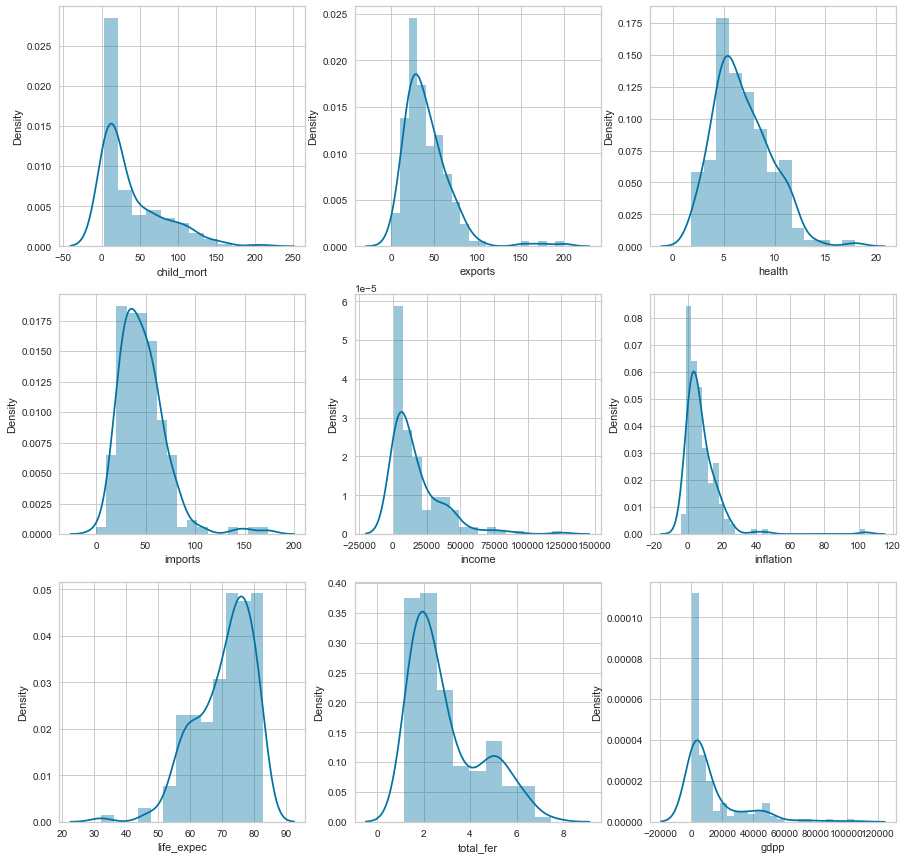

In [29]:
#Data visulization
df_cols=df.columns
fig,ax=plt.subplots( nrows=3,ncols=3,figsize=[15,15])
for col,sub in zip(df_cols,ax.flatten()):
    sns.distplot(df[col],ax=sub)

In [30]:
#Check of missing values
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

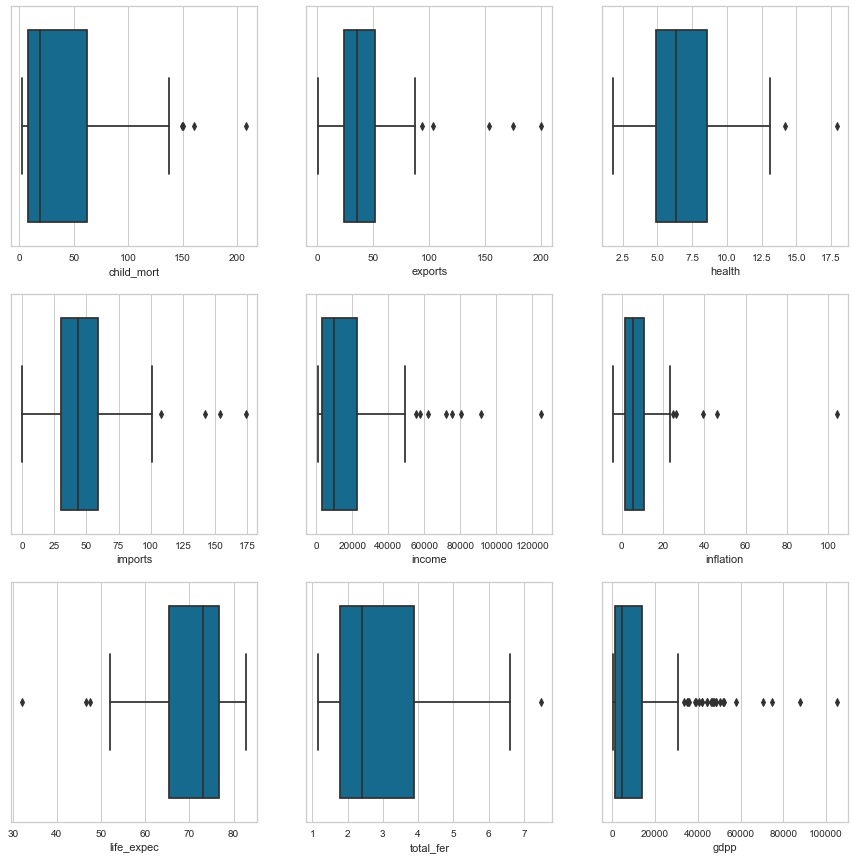

In [31]:
#Check of outliers
df_cols=df.columns
fig,ax=plt.subplots( nrows=3,ncols=3,figsize=[15,15])
for col,sub in zip(df_cols,ax.flatten()):
    sns.boxplot(df[col],ax=sub)

In [34]:
#Data standardization
SS=StandardScaler()
Scaleddf=SS.fit_transform(df)
Scaleddf

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [37]:
#PCA
pca=PCA(0.95)
pca_res=pca.fit_transform(Scaleddf)
#Important Features from PCA
print("Important Features from PCA are",pca.n_components_)
print("Shape of pca_res",pca_res.shape)

Important Features from PCA are 6
Shape of pca_res (167, 6)


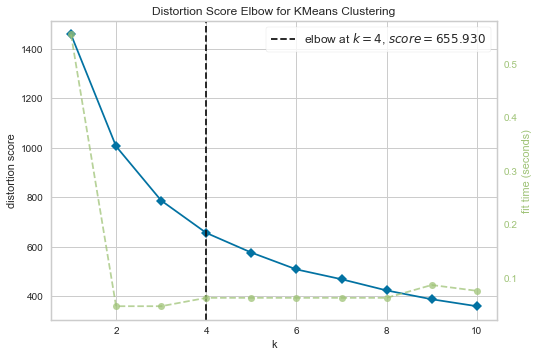

KMeans(n_clusters=4)

In [45]:
#Finding out the number of clusters
elbow_method=kelbow_visualizer(model=KMeans(random_state=42),X=pca_res,k=(1,11))
#Instantiate the model
Model=KMeans(n_clusters=elbow_method.elbow_value_)
#Model fitting
Model.fit(pca_res)

In [57]:
#Prediction using Model
df["Country Segmentation"]=Model.predict(pca_res)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Country Segementation,Country Segmentation
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,2


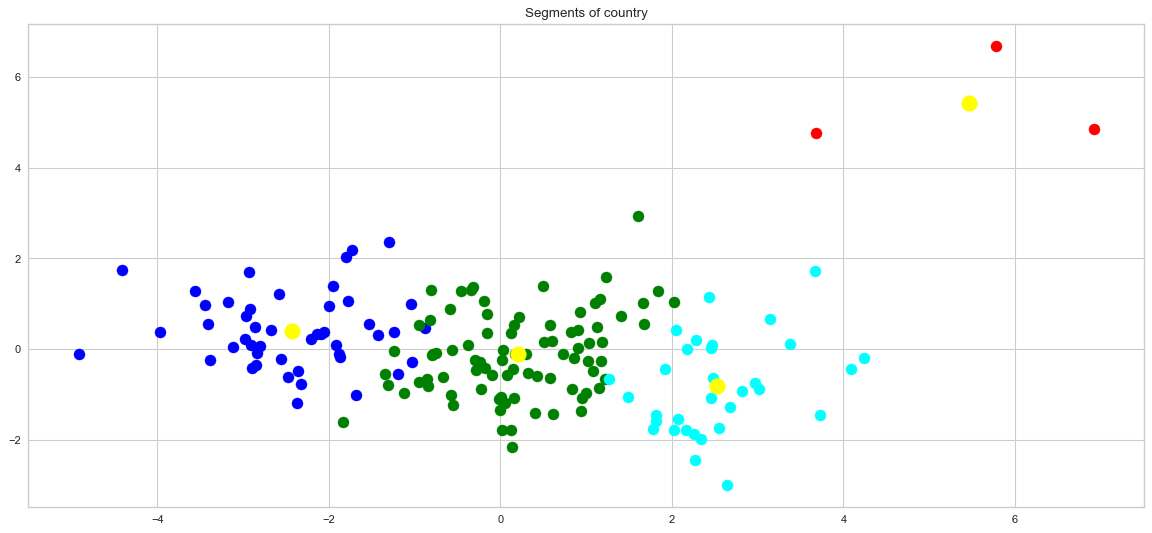

In [58]:
#Visulization
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(pca_res[df["Country Segmentation"] == 0, 0], pca_res[df["Country Segmentation"] == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(pca_res[df["Country Segmentation"] == 1, 0], pca_res[df["Country Segmentation"] == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(pca_res[df["Country Segmentation"] == 2, 0], pca_res[df["Country Segmentation"] == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(pca_res[df["Country Segmentation"] == 3, 0], pca_res[df["Country Segmentation"] == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(Model.cluster_centers_[:, 0], Model.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Segments of country')
plt.show()

# Thank You